In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 640x480 with 0 Axes>

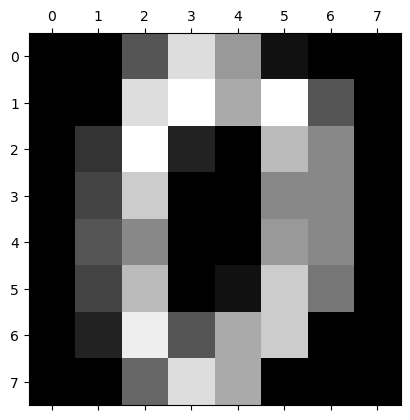

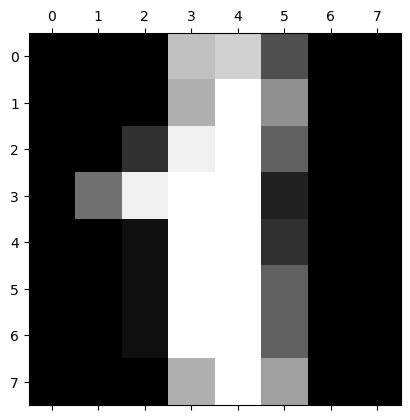

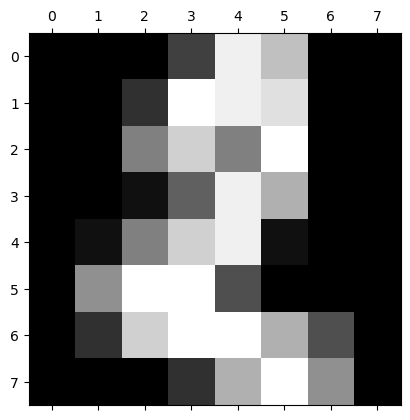

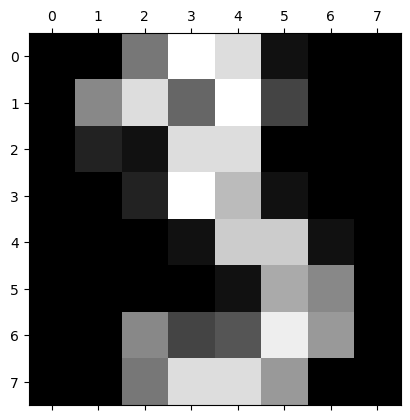

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i])

In [3]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
df['target'] = digits.target

In [5]:
X = df.drop('target',axis='columns')
y = df.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [7]:

model.score(X_test, y_test)

0.9444444444444444

In [8]:
y_predicted = model.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 38,  0,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  1],
       [ 0,  3,  0,  2,  1,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  2,  1,  2,  0,  0,  1, 31]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

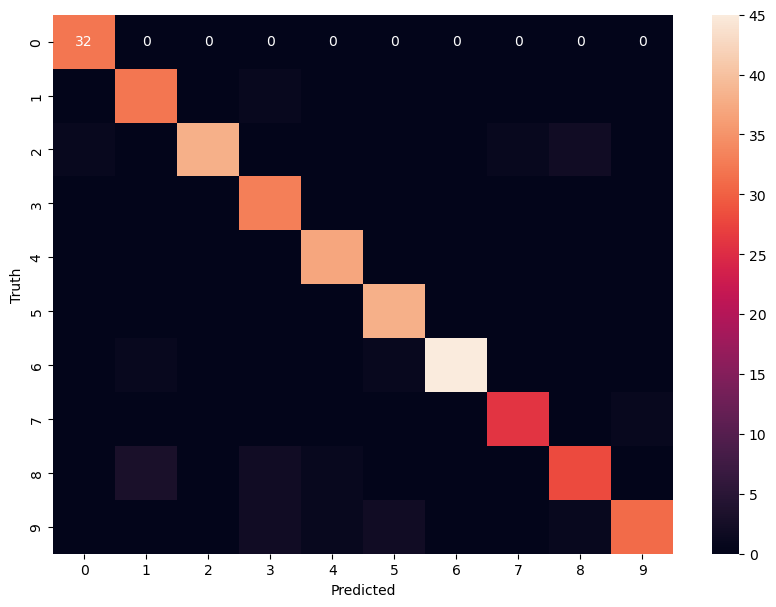

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')